# claudette

> Claudette is Claude's friend

In [ ]:
#| hide

from nbdev import show_doc
from fastcore.utils import *
from IPython.display import Image,display
from cachy import enable_cachy

In [ ]:
#| hide
enable_cachy()

> **NB**: If you are reading this in GitHub's readme, we recommend you instead read the much more nicely formatted [documentation format](https://claudette.answer.ai/) of this tutorial.

*Claudette* is a wrapper for Anthropic's [Python SDK](https://github.com/anthropics/anthropic-sdk-python).

The SDK works well, but it is quite low level -- it leaves the developer to do a lot of stuff manually. That's a lot of extra work and boilerplate! Claudette automates pretty much everything that can be automated, whilst providing full control. Amongst the features provided:

- A `Chat` class that creates stateful dialogs
- Support for *prefill*, which tells Claude what to use as the first few words of its response
- Convenient image support
- Simple and convenient support for Claude's new Tool Use API.

You'll need to set the `ANTHROPIC_API_KEY` environment variable to the key provided to you by Anthropic in order to use this library.

Note that this library is the first ever "literate nbdev" project. That means that the actual source code for the library is a rendered Jupyter Notebook which includes callout notes and tips, HTML tables and images, detailed explanations, and teaches *how* and *why* the code is written the way it is. Even if you've never used the Anthropic Python SDK or Claude API before, you should be able to read the source code. Click [Claudette's Source](https://claudette.answer.ai/core.html) to read it, or clone the git repo and execute the notebook yourself to see every step of the creation process in action. The tutorial below includes links to API details which will take you to relevant parts of the source. The reason this project is a new kind of literal program is because we take seriously Knuth's call to action, that we have a "*moral commitment*" to never write an "*illiterate program*" -- and so we have a commitment to making literate programming an easy and pleasant experience. (For more on this, see [this talk](https://www.youtube.com/watch?v=rX1yGxJijsI) from Hamel Husain.)

> "*Let us change our traditional attitude to the construction of programs: Instead of imagining that our main task is to instruct a **computer** what to do, let us concentrate rather on explaining to **human beings** what we want a computer to do.*" Donald E. Knuth, [Literate Programming](https://www.cs.tufts.edu/~nr/cs257/archive/literate-programming/01-knuth-lp.pdf) (1984)

## Install

```sh
pip install claudette
```

## Getting started

Anthropic's Python SDK will automatically be installed with Claudette, if you don't already have it.

In [ ]:
import os
# os.environ['ANTHROPIC_LOG'] = 'debug'

To print every HTTP request and response in full, uncomment the above line.

In [ ]:
from claudette import *

Claudette only exports the symbols that are needed to use the library, so you can use `import *` to import them. Alternatively, just use:

```python
import claudette
```

...and then add the prefix `claudette.` to any usages of the module.

Claudette provides `models`, which is a list of models currently available from the SDK.

In [ ]:
models

['claude-opus-4-6',
 'claude-sonnet-4-6',
 'claude-haiku-4-5',
 'claude-opus-4-5',
 'claude-sonnet-4-5',
 'claude-opus-4-1-20250805',
 'claude-opus-4-20250514',
 'claude-3-opus-20240229',
 'claude-sonnet-4-20250514',
 'claude-3-7-sonnet-20250219']

For these examples, we'll use the latest Sonnet, since it's awesome!

In [ ]:
model = models[1]
model

'claude-sonnet-4-6'

## Chat

The main interface to Claudette is the `Chat` class, which provides a stateful interface to Claude:

In [ ]:
chat = Chat(model, sp="""You are a helpful and concise assistant.""")
chat("I'm Jeremy")

Hi Jeremy! Nice to meet you. How can I help you today?

<details>

- id: `msg_013Rva2xWKUGj5uWmMT2FgpD`
- container: `None`
- content: `[{'citations': None, 'text': 'Hi Jeremy! Nice to meet you. How can I help you today?', 'type': 'text'}]`
- model: `claude-sonnet-4-6`
- role: `assistant`
- stop_reason: `end_turn`
- stop_sequence: `None`
- type: `message`
- usage: `{'cache_creation': {'ephemeral_1h_input_tokens': 0, 'ephemeral_5m_input_tokens': 0}, 'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0, 'inference_geo': 'global', 'input_tokens': 20, 'output_tokens': 18, 'server_tool_use': None, 'service_tier': 'standard'}`

</details>

In [ ]:
r = chat("What's my name?")
r

Your name is Jeremy! You told me at the start of our conversation.

<details>

- id: `msg_01Ga3WLVuuSimKWFaay51Mfn`
- container: `None`
- content: `[{'citations': None, 'text': 'Your name is Jeremy! You told me at the start of our conversation.', 'type': 'text'}]`
- model: `claude-sonnet-4-6`
- role: `assistant`
- stop_reason: `end_turn`
- stop_sequence: `None`
- type: `message`
- usage: `{'cache_creation': {'ephemeral_1h_input_tokens': 0, 'ephemeral_5m_input_tokens': 0}, 'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0, 'inference_geo': 'global', 'input_tokens': 46, 'output_tokens': 18, 'server_tool_use': None, 'service_tier': 'standard'}`

</details>

In [ ]:
r = chat("What's my name?")
r

Your name is Jeremy! You mentioned it at the beginning of our chat.

<details>

- id: `msg_01VDXgMU8PdjD4oeuR2Xo6KJ`
- container: `None`
- content: `[{'citations': None, 'text': 'Your name is Jeremy! You mentioned it at the beginning of our chat.', 'type': 'text'}]`
- model: `claude-sonnet-4-6`
- role: `assistant`
- stop_reason: `end_turn`
- stop_sequence: `None`
- type: `message`
- usage: `{'cache_creation': {'ephemeral_1h_input_tokens': 0, 'ephemeral_5m_input_tokens': 0}, 'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0, 'inference_geo': 'global', 'input_tokens': 72, 'output_tokens': 18, 'server_tool_use': None, 'service_tier': 'standard'}`

</details>

As you see above, displaying the results of a call in a notebook shows just the message contents, with the other details hidden behind a collapsible section. Alternatively you can `print` the details:

In [ ]:
print(r)

Message(id='msg_01VDXgMU8PdjD4oeuR2Xo6KJ', container=None, content=[TextBlock(citations=None, text='Your name is Jeremy! You mentioned it at the beginning of our chat.', type='text')], model='claude-sonnet-4-6', role='assistant', stop_reason='end_turn', stop_sequence=None, type='message', usage=In: 72; Out: 18; Cache create: 0; Cache read: 0; Total Tokens: 90; Search: 0; Fetch: 0)


You can add `stream=True` to stream the results as soon as they arrive (although you will only see the gradual generation if you execute the notebook yourself, of course!)

### Async

Alternatively, you can use `AsyncChat` (or `AsyncClient`) for the async versions, e.g:

In [ ]:
chat = AsyncChat(model)
await chat("I'm Jeremy")

Hi Jeremy! Nice to meet you. How can I help you today?

<details>

- id: `msg_01M4N4EGidKKDQ4KzLhWmfxb`
- container: `None`
- content: `[{'citations': None, 'text': 'Hi Jeremy! Nice to meet you. How can I help you today?', 'type': 'text'}]`
- model: `claude-sonnet-4-6`
- role: `assistant`
- stop_reason: `end_turn`
- stop_sequence: `None`
- type: `message`
- usage: `{'cache_creation': {'ephemeral_1h_input_tokens': 0, 'ephemeral_5m_input_tokens': 0}, 'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0, 'inference_geo': 'global', 'input_tokens': 10, 'output_tokens': 18, 'server_tool_use': None, 'service_tier': 'standard'}`

</details>

Remember to use `async for` when streaming in this case:

In [ ]:
async for o in await chat("Concisely, what is the meaning of life?", stream=True):
    print(o, end='')

A classic question! Here are a few perspectives:

- **Philosophical**: To seek happiness, virtue, or purpose (Aristotle, Stoics)
- **Religious**: To serve/know God or achieve enlightenment
- **Existential**: Life has no inherent meaning — you create your own
- **Scientific**: Biologically, to survive and reproduce
- **Simple**: To love, connect, and find joy

The honest answer is **there's no single universal answer** — it's one of humanity's most personal questions.

What do *you* think, Jeremy?

## Prompt caching

Claude supports [prompt caching](https://docs.anthropic.com/en/docs/build-with-claude/prompt-caching), which can significantly reduce token usage costs when working with large contexts or repetitive elements. When you use `mk_msg(msg, cache=True)`, Claudette adds the necessary cache control headers to make that message cacheable.

Prompt caching works by marking segments of your prompt for efficient reuse. When a cached segment is encountered again, Claude reads it from the cache rather than processing the full content, resulting in a 90% reduction in token costs for those segments.

Some key points about prompt caching:
- Cache writes cost 25% more than normal input tokens
- Cache reads cost 90% less than normal input tokens
- Minimum cacheable length is model-dependent (1024-2048 tokens)
- Cached segments must be completely identical to be reused
- Works well for system prompts, tool definitions, and large context blocks

For instance, here we use caching when asking about Claudette's readme file:

In [ ]:
chat = Chat(model, sp="""You are a helpful and concise assistant.""")

In [ ]:
nbtxt = Path('README.txt').read_text()
msg = f'''<README>
{nbtxt}
</README>
In brief, what is the purpose of this project based on the readme?'''
r = chat(mk_msg(msg, cache=True))
r

Claudette is a high-level Python wrapper around Anthropic's Claude API SDK that simplifies common tasks. Its key purposes are:

1. **Reduce boilerplate** – automates repetitive low-level SDK work
2. **Stateful chat** – provides a `Chat` class for multi-turn conversations
3. **Tool use** – makes it easy to give Claude access to Python functions
4. **Structured output** – extract typed/structured data from Claude's responses
5. **Extra conveniences** – prefill support, image handling, prompt caching, streaming, and async support
6. **Multi-provider support** – works with Anthropic directly, AWS Bedrock, and Google Vertex

In short: it makes working with Claude easier and more ergonomic while retaining full control.

<details>

- id: `msg_01Eeco89ejrtQCnoU1DY8XWJ`
- container: `None`
- content: `[{'citations': None, 'text': "Claudette is a high-level Python wrapper around Anthropic's Claude API SDK that simplifies common tasks. Its key purposes are:\n\n1. **Reduce boilerplate** – automates repetitive low-level SDK work\n2. **Stateful chat** – provides a `Chat` class for multi-turn conversations\n3. **Tool use** – makes it easy to give Claude access to Python functions\n4. **Structured output** – extract typed/structured data from Claude's responses\n5. **Extra conveniences** – prefill support, image handling, prompt caching, streaming, and async support\n6. **Multi-provider support** – works with Anthropic directly, AWS Bedrock, and Google Vertex\n\nIn short: it makes working with Claude easier and more ergonomic while retaining full control.", 'type': 'text'}]`
- model: `claude-sonnet-4-6`
- role: `assistant`
- stop_reason: `end_turn`
- stop_sequence: `None`
- type: `message`
- usage: `{'cache_creation': {'ephemeral_1h_input_tokens': 0, 'ephemeral_5m_input_tokens': 9289}, 'cache_creation_input_tokens': 9289, 'cache_read_input_tokens': 0, 'inference_geo': 'global', 'input_tokens': 3, 'output_tokens': 181, 'server_tool_use': None, 'service_tier': 'standard'}`

</details>

The response records the a cache has been created using these input tokens:

In [ ]:
print(r.usage)

Usage(cache_creation=CacheCreation(ephemeral_1h_input_tokens=0, ephemeral_5m_input_tokens=9289), cache_creation_input_tokens=9289, cache_read_input_tokens=0, inference_geo='global', input_tokens=3, output_tokens=181, server_tool_use=None, service_tier='standard')


We can now ask a followup question in this chat:

In [ ]:
r = chat('How does it make tool use more ergonomic?')
r

Based on the README, Claudette makes tool use more ergonomic in several ways:

1. **Docments-based function definitions** – You define tools as plain Python functions using type annotations and inline comments to describe parameters, rather than writing verbose JSON schemas manually:
   ```python
   def sums(
       a:int,  # First thing to sum
       b:int=1 # Second thing to sum
   ) -> int: # The sum of the inputs
       "Adds a + b."
       return a + b
   ```

2. **Automatic tool call handling** – When Claude returns a `tool_use` message, Claudette automatically calls the function with the provided arguments. You just call `chat()` again and it handles everything behind the scenes.

3. **`toolloop` method** – A single call to `chat.toolloop()` can handle multi-step problems requiring multiple sequential tool calls (e.g. first calling `sums`, then `mults`), without you needing to manually manage the back-and-forth.

4. **`structured` method** – For simple cases where you just want the result of a single tool call, `Client.structured()` handles everything in one step and returns the result directly.

5. **`tool_choice` option** – You can force Claude to always use a specific tool by passing its name to `tool_choice`, giving you control over when tools are invoked.

In summary, it removes the manual boilerplate of schema definition, response parsing, and tool dispatch loops.

<details>

- id: `msg_017w4Fhy4g2Th8nwskbwnfRi`
- container: `None`
- content: `[{'citations': None, 'text': 'Based on the README, Claudette makes tool use more ergonomic in several ways:\n\n1. **Docments-based function definitions** – You define tools as plain Python functions using type annotations and inline comments to describe parameters, rather than writing verbose JSON schemas manually:\n   ```python\n   def sums(\n       a:int,  # First thing to sum\n       b:int=1 # Second thing to sum\n   ) -> int: # The sum of the inputs\n       "Adds a + b."\n       return a + b\n   ```\n\n2. **Automatic tool call handling** – When Claude returns a `tool_use` message, Claudette automatically calls the function with the provided arguments. You just call `chat()` again and it handles everything behind the scenes.\n\n3. **`toolloop` method** – A single call to `chat.toolloop()` can handle multi-step problems requiring multiple sequential tool calls (e.g. first calling `sums`, then `mults`), without you needing to manually manage the back-and-forth.\n\n4. **`structured` method** – For simple cases where you just want the result of a single tool call, `Client.structured()` handles everything in one step and returns the result directly.\n\n5. **`tool_choice` option** – You can force Claude to always use a specific tool by passing its name to `tool_choice`, giving you control over when tools are invoked.\n\nIn summary, it removes the manual boilerplate of schema definition, response parsing, and tool dispatch loops.', 'type': 'text'}]`
- model: `claude-sonnet-4-6`
- role: `assistant`
- stop_reason: `end_turn`
- stop_sequence: `None`
- type: `message`
- usage: `{'cache_creation': {'ephemeral_1h_input_tokens': 0, 'ephemeral_5m_input_tokens': 0}, 'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 9289, 'inference_geo': 'global', 'input_tokens': 198, 'output_tokens': 346, 'server_tool_use': None, 'service_tier': 'standard'}`

</details>

We can see that this only used ~200 regular input tokens -- the 7000+ context tokens have been read from cache.

In [ ]:
print(r.usage)

Usage(cache_creation=CacheCreation(ephemeral_1h_input_tokens=0, ephemeral_5m_input_tokens=0), cache_creation_input_tokens=0, cache_read_input_tokens=9289, inference_geo='global', input_tokens=198, output_tokens=346, server_tool_use=None, service_tier='standard')


In [ ]:
chat.use

In: 201; Out: 527; Cache create: 9289; Cache read: 9289; Total Tokens: 19306; Search: 0; Fetch: 0

## Tool use

[Tool use](https://docs.anthropic.com/claude/docs/tool-use) lets Claude use external tools.

We use [docments](https://fastcore.fast.ai/docments.html) to make defining Python functions as ergonomic as possible. Each parameter (and the return value) should have a type, and a docments comment with the description of what it is. As an example we'll write a simple function that adds numbers together, and will tell us when it's being called:

In [ ]:
def sums(
    a:int,  # First thing to sum
    b:int=1 # Second thing to sum
) -> int: # The sum of the inputs
    "Adds a + b."
    print(f"Finding the sum of {a} and {b}")
    return a + b

Sometimes Claude will try to add stuff up "in its head", so we'll use a system prompt to ask it not to.

In [ ]:
sp = "Always use tools if math ops are needed."

We'll get Claude to add up some long numbers:

In [ ]:
a,b = 604542,6458932
pr = f"What is {a}+{b}?"
pr

'What is 604542+6458932?'

To use tools, pass a list of them to `Chat`:

In [ ]:
chat = Chat(model, sp=sp, tools=[sums])

To force Claude to always answer using a tool, set `tool_choice` to that function name. When Claude needs to use a tool, it doesn't return the answer, but instead returns a `tool_use` message, which means we have to call the named tool with the provided parameters.

In [ ]:
r = chat(pr, tool_choice='sums')
r

Finding the sum of 604542 and 6458932


[ToolUseBlock(id='toolu_01Me4y668vh5CbRCYDm9GTmd', caller=DirectCaller(type='direct'), input={'a': 604542, 'b': 6458932}, name='sums', type='tool_use')]

<details>

- id: `msg_01XymeBh9aPp5HJJjm6zwxja`
- container: `None`
- content: `[{'id': 'toolu_01Me4y668vh5CbRCYDm9GTmd', 'caller': {'type': 'direct'}, 'input': {'a': 604542, 'b': 6458932}, 'name': 'sums', 'type': 'tool_use'}]`
- model: `claude-sonnet-4-6`
- role: `assistant`
- stop_reason: `tool_use`
- stop_sequence: `None`
- type: `message`
- usage: `{'cache_creation': {'ephemeral_1h_input_tokens': 0, 'ephemeral_5m_input_tokens': 0}, 'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0, 'inference_geo': 'global', 'input_tokens': 725, 'output_tokens': 53, 'server_tool_use': None, 'service_tier': 'standard'}`

</details>

Claudette handles all that for us -- we just call it again, and it all happens automatically:

In [ ]:
chat()

The sum of 604,542 + 6,458,932 is **7,063,474**!

<details>

- id: `msg_01WAdAsXseRvPmEAyg63bpCk`
- container: `None`
- content: `[{'citations': None, 'text': 'The sum of 604,542 + 6,458,932 is **7,063,474**!', 'type': 'text'}]`
- model: `claude-sonnet-4-6`
- role: `assistant`
- stop_reason: `end_turn`
- stop_sequence: `None`
- type: `message`
- usage: `{'cache_creation': {'ephemeral_1h_input_tokens': 0, 'ephemeral_5m_input_tokens': 0}, 'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0, 'inference_geo': 'global', 'input_tokens': 717, 'output_tokens': 28, 'server_tool_use': None, 'service_tier': 'standard'}`

</details>

You can see how many tokens have been used at any time by checking the `use` property. Note that (as of May 2024) tool use in Claude uses a *lot* of tokens, since it automatically adds a large system prompt.

In [ ]:
chat.use

In: 1442; Out: 81; Cache create: 0; Cache read: 0; Total Tokens: 1523; Search: 0; Fetch: 0

We can do everything needed to use tools in a single step, by using `Chat.toolloop`. This can even call multiple tools as needed solve a problem. For example, let's define a tool to handle multiplication:

In [ ]:
def mults(
    a:int,  # First thing to multiply
    b:int=1 # Second thing to multiply
) -> int: # The product of the inputs
    "Multiplies a * b."
    print(f"Finding the product of {a} and {b}")
    return a * b

Now with a single call we can calculate `(a+b)*2` -- by passing `show_trace` we can see each response from Claude in the process:

In [ ]:
chat = Chat(model, sp=sp, tools=[sums,mults])
pr = f'Calculate ({a}+{b})*2'
pr

'Calculate (604542+6458932)*2'

In [ ]:
for o in chat.toolloop(pr): display(o)

Finding the sum of 604542 and 6458932


I need to calculate (604542 + 6458932) * 2. Let me start by computing the sum first.

<details>

- id: `msg_016D9YoZZnhn6FBwuTaA2xtV`
- container: `None`
- content: `[{'citations': None, 'text': 'I need to calculate (604542 + 6458932) * 2. Let me start by computing the sum first.', 'type': 'text'}, {'id': 'toolu_01S4a9Qz4eVGvp8YsYuPGWty', 'caller': {'type': 'direct'}, 'input': {'a': 604542, 'b': 6458932}, 'name': 'sums', 'type': 'tool_use'}]`
- model: `claude-sonnet-4-6`
- role: `assistant`
- stop_reason: `tool_use`
- stop_sequence: `None`
- type: `message`
- usage: `{'cache_creation': {'ephemeral_1h_input_tokens': 0, 'ephemeral_5m_input_tokens': 0}, 'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0, 'inference_geo': 'global', 'input_tokens': 735, 'output_tokens': 100, 'server_tool_use': None, 'service_tier': 'standard'}`

</details>

```python
{ 'content': [ { 'content': '7063474',
                 'tool_use_id': 'toolu_01S4a9Qz4eVGvp8YsYuPGWty',
                 'type': 'tool_result'}],
  'role': 'user'}
```

Finding the product of 7063474 and 2


Now let me multiply the result by 2.

<details>

- id: `msg_01PHLZzu8mX7dSaRhBQcAgJi`
- container: `None`
- content: `[{'citations': None, 'text': 'Now let me multiply the result by 2.', 'type': 'text'}, {'id': 'toolu_01Bvt9ZmBX7YpStiTBzceemY', 'caller': {'type': 'direct'}, 'input': {'a': 7063474, 'b': 2}, 'name': 'mults', 'type': 'tool_use'}]`
- model: `claude-sonnet-4-6`
- role: `assistant`
- stop_reason: `tool_use`
- stop_sequence: `None`
- type: `message`
- usage: `{'cache_creation': {'ephemeral_1h_input_tokens': 0, 'ephemeral_5m_input_tokens': 0}, 'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0, 'inference_geo': 'global', 'input_tokens': 850, 'output_tokens': 82, 'server_tool_use': None, 'service_tier': 'standard'}`

</details>

```python
{ 'content': [ { 'content': '14126948',
                 'tool_use_id': 'toolu_01Bvt9ZmBX7YpStiTBzceemY',
                 'type': 'tool_result'}],
  'role': 'user'}
```

Here's the breakdown of the calculation:

1. **604542 + 6458932 = 7,063,474**
2. **7,063,474 × 2 = 14,126,948**

Therefore, **(604542 + 6458932) × 2 = 14,126,948**

<details>

- id: `msg_01LWmJoTjBJsKgnroMXPSxD9`
- container: `None`
- content: `[{'citations': None, 'text': "Here's the breakdown of the calculation:\n\n1. **604542 + 6458932 = 7,063,474**\n2. **7,063,474 × 2 = 14,126,948**\n\nTherefore, **(604542 + 6458932) × 2 = 14,126,948**", 'type': 'text'}]`
- model: `claude-sonnet-4-6`
- role: `assistant`
- stop_reason: `end_turn`
- stop_sequence: `None`
- type: `message`
- usage: `{'cache_creation': {'ephemeral_1h_input_tokens': 0, 'ephemeral_5m_input_tokens': 0}, 'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0, 'inference_geo': 'global', 'input_tokens': 947, 'output_tokens': 80, 'server_tool_use': None, 'service_tier': 'standard'}`

</details>

## Structured data

If you just want the immediate result from a single tool, use `Client.structured`.

In [ ]:
cli = Client(model)

In [ ]:
def sums(
    a:int,  # First thing to sum
    b:int=1 # Second thing to sum
) -> int: # The sum of the inputs
    "Adds a + b."
    print(f"Finding the sum of {a} and {b}")
    return a + b

In [ ]:
cli.structured("What is 604542+6458932", sums)

Finding the sum of 604542 and 6458932


[7063474]

This is particularly useful for getting back structured information, e.g:

In [ ]:
class President:
    "Information about a president of the United States"
    def __init__(self, 
                first:str, # first name
                last:str, # last name
                spouse:str, # name of spouse
                years_in_office:str, # format: "{start_year}-{end_year}"
                birthplace:str, # name of city
                birth_year:int # year of birth, `0` if unknown
        ):
        assert re.match(r'\d{4}-\d{4}', years_in_office), "Invalid format: `years_in_office`"
        store_attr()

    __repr__ = basic_repr('first, last, spouse, years_in_office, birthplace, birth_year')

In [ ]:
cli.structured("Provide key information about the 3rd President of the United States", President)

[President(first='Thomas', last='Jefferson', spouse='Martha Jefferson', years_in_office='1801-1809', birthplace='Shadwell', birth_year=1743)]

## Images

Claude can handle image data as well. As everyone knows, when testing image APIs you have to use a cute puppy.

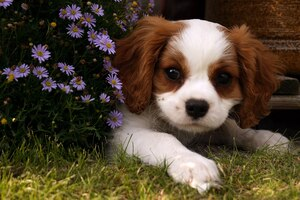

In [ ]:
fn = Path('samples/puppy.jpg')
Image(filename=fn, width=200)

We create a `Chat` object as before:

In [ ]:
chat = Chat(model)

Claudette expects images as a list of bytes, so we read in the file:

In [ ]:
img = fn.read_bytes()

Prompts to Claudette can be lists, containing text, images, or both, eg:

In [ ]:
chat([img, "In brief, what color flowers are in this image?"])

The flowers in the image are **purple/lavender** (blue-purple). They appear to be **asters**.

<details>

- id: `msg_01DUds87tAj47fozgFfbEPrQ`
- container: `None`
- content: `[{'citations': None, 'text': 'The flowers in the image are **purple/lavender** (blue-purple). They appear to be **asters**.', 'type': 'text'}]`
- model: `claude-sonnet-4-6`
- role: `assistant`
- stop_reason: `end_turn`
- stop_sequence: `None`
- type: `message`
- usage: `{'cache_creation': {'ephemeral_1h_input_tokens': 0, 'ephemeral_5m_input_tokens': 0}, 'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0, 'inference_geo': 'global', 'input_tokens': 110, 'output_tokens': 28, 'server_tool_use': None, 'service_tier': 'standard'}`

</details>

The image is included as input tokens.

In [ ]:
chat.use

In: 110; Out: 28; Cache create: 0; Cache read: 0; Total Tokens: 138; Search: 0; Fetch: 0

Alternatively, Claudette supports creating a multi-stage chat with separate image and text prompts. For instance, you can pass just the image as the initial prompt (in which case Claude will make some general comments about what it sees), and then follow up with questions in additional prompts:

In [ ]:
chat = Chat(model)
chat(img)

# Adorable Cavalier King Charles Spaniel Puppy 🐾

What a precious photo! This appears to be a **Cavalier King Charles Spaniel** puppy, characterized by:

- **Chestnut/ruby and white** coloring (called "Blenheim" pattern)
- Large, **round dark eyes**
- Long, **floppy ears**
- Soft, silky coat

The puppy is resting in **green grass** next to beautiful **purple aster flowers**, making for a perfect portrait shot! 🌸

Cavalier King Charles Spaniels are known for being:
- 💕 Affectionate and gentle
- 🏠 Great family dogs
- 🐕 Eager to please
- 😊 Friendly with everyone

This little one looks to be just a **few months old** — absolutely adorable! 🥰

<details>

- id: `msg_01AnF9pQ6LZd4hPyVvFridhD`
- container: `None`
- content: `[{'citations': None, 'text': '# Adorable Cavalier King Charles Spaniel Puppy 🐾\n\nWhat a precious photo! This appears to be a **Cavalier King Charles Spaniel** puppy, characterized by:\n\n- **Chestnut/ruby and white** coloring (called "Blenheim" pattern)\n- Large, **round dark eyes**\n- Long, **floppy ears**\n- Soft, silky coat\n\nThe puppy is resting in **green grass** next to beautiful **purple aster flowers**, making for a perfect portrait shot! 🌸\n\nCavalier King Charles Spaniels are known for being:\n- 💕 Affectionate and gentle\n- 🏠 Great family dogs\n- 🐕 Eager to please\n- 😊 Friendly with everyone\n\nThis little one looks to be just a **few months old** — absolutely adorable! 🥰', 'type': 'text'}]`
- model: `claude-sonnet-4-6`
- role: `assistant`
- stop_reason: `end_turn`
- stop_sequence: `None`
- type: `message`
- usage: `{'cache_creation': {'ephemeral_1h_input_tokens': 0, 'ephemeral_5m_input_tokens': 0}, 'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0, 'inference_geo': 'global', 'input_tokens': 98, 'output_tokens': 213, 'server_tool_use': None, 'service_tier': 'standard'}`

</details>

In [ ]:
chat('What direction is the puppy facing?')

## Direction the Puppy is Facing

The puppy is facing **toward the camera** (forward), looking directly at the viewer.

Its head is slightly **angled/tilted**, giving it that classic adorable puppy look! 🐾

The puppy appears to be **lying down** in the grass with its front paws extended, with the purple flowers to its **left side** (our right).

<details>

- id: `msg_012tHpJy12tRC6hB4THWfhiZ`
- container: `None`
- content: `[{'citations': None, 'text': '## Direction the Puppy is Facing\n\nThe puppy is facing **toward the camera** (forward), looking directly at the viewer.\n\nIts head is slightly **angled/tilted**, giving it that classic adorable puppy look! 🐾\n\nThe puppy appears to be **lying down** in the grass with its front paws extended, with the purple flowers to its **left side** (our right).', 'type': 'text'}]`
- model: `claude-sonnet-4-6`
- role: `assistant`
- stop_reason: `end_turn`
- stop_sequence: `None`
- type: `message`
- usage: `{'cache_creation': {'ephemeral_1h_input_tokens': 0, 'ephemeral_5m_input_tokens': 0}, 'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0, 'inference_geo': 'global', 'input_tokens': 322, 'output_tokens': 93, 'server_tool_use': None, 'service_tier': 'standard'}`

</details>

In [ ]:
chat('What color is it?')

## The Puppy's Colors 🎨

The puppy has a **two-toned coat** known as the **"Blenheim"** pattern:

- **Chestnut/Reddish-Brown** - on its ears and patches on its face/head
- **White** - on its muzzle, chest, and body

### Other Color Details:
- **Dark brown/black** nose
- **Dark brown** eyes
- The colors have a **soft, silky** appearance typical of Cavalier King Charles Spaniels

This Blenheim coloring is one of the most **classic and recognizable** patterns for this breed! 🐕

<details>

- id: `msg_01W6p3tEiJxPPE3yXqQ3RHMD`
- container: `None`
- content: `[{'citations': None, 'text': '## The Puppy\'s Colors 🎨\n\nThe puppy has a **two-toned coat** known as the **"Blenheim"** pattern:\n\n- **Chestnut/Reddish-Brown** - on its ears and patches on its face/head\n- **White** - on its muzzle, chest, and body\n\n### Other Color Details:\n- **Dark brown/black** nose\n- **Dark brown** eyes\n- The colors have a **soft, silky** appearance typical of Cavalier King Charles Spaniels\n\nThis Blenheim coloring is one of the most **classic and recognizable** patterns for this breed! 🐕', 'type': 'text'}]`
- model: `claude-sonnet-4-6`
- role: `assistant`
- stop_reason: `end_turn`
- stop_sequence: `None`
- type: `message`
- usage: `{'cache_creation': {'ephemeral_1h_input_tokens': 0, 'ephemeral_5m_input_tokens': 0}, 'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0, 'inference_geo': 'global', 'input_tokens': 423, 'output_tokens': 156, 'server_tool_use': None, 'service_tier': 'standard'}`

</details>

Note that the image is passed in again for every input in the dialog, so that number of input tokens increases quickly with this kind of chat. (For large images, using prompt caching might be a good idea.)

In [ ]:
chat.use

In: 843; Out: 462; Cache create: 0; Cache read: 0; Total Tokens: 1305; Search: 0; Fetch: 0

## Extended Thinking

Claude >=3.7 Sonnet and Opus have enhanced reasoning capabilities through [extended thinking](https://docs.anthropic.com/en/docs/build-with-claude/extended-thinking). This feature allows Claude to think through complex problems step-by-step, making its reasoning process transparent and its final answers more reliable.

To enable extended thinking, simply specify the number of thinking tokens using the `maxthinktok` parameter when making a call to Chat. The thinking process will appear in a collapsible section in the response.

Some important notes about extended thinking:

- Only available with select models
- Automatically sets `temperature=1` when enabled (required for thinking to work)
- Cannot be used with `prefill` (these features are incompatible)
- Thinking is presented in a separate collapsible block in the response
- The thinking tokens count toward your usage but help with complex reasoning

To access models that support extended thinking, you can use `has_extended_thinking_models`.

In [ ]:
has_extended_thinking_models

{'claude-3-7-sonnet-20250219',
 'claude-haiku-4-5',
 'claude-opus-4-1-20250805',
 'claude-opus-4-20250514',
 'claude-opus-4-5',
 'claude-opus-4-6',
 'claude-sonnet-4-20250514',
 'claude-sonnet-4-5',
 'claude-sonnet-4-6'}

In [ ]:
chat = Chat(model)

In [ ]:
chat('Write a sentence about Python!', maxthinktok=1024)


Here's a sentence about Python:

**Python is a versatile, beginner-friendly programming language known for its clean, readable syntax and wide range of applications, from web development and data science to artificial intelligence and automation.**

Would you like to know more about Python? 🐍

<details>
<summary>Thinking</summary>
The user wants a sentence about Python. I can write about either the programming language or the snake.
</details>


<details>

- id: `msg_01JskDndrbaWnSQgv6qCdAqS`
- container: `None`
- content: `[{'signature': 'Eo8CCkYICxgCKkCBEKnKVDpDoGHOpgbeicO3HN7C5IAEV4gKKcy5K5P1sK0OSwqddH86GNSttMnCuRVR/8xQ+PB2IDnIwEQnJu1JEgzaa51QCorORWmhxJkaDOTIO6MdGx0eiWVelCIwakucJThWzglRgVQhli6gpNZEZCN0glxGhFKbIXXIsN5dyKp0J6MAaUKaIJHTKwTwKneqlOSxU2yBi5cR/gWtnXS4HWEd7eMdqz5lmwt9CW04ExUcCiEz/1wTkIL88ImthnBq3JwhDvSSAqkeneLpI35foO4fio6+C3aLF971rgx9T7Y9dV69yii56gtPjeQT3Rwg1y6xyWlh3ITdoSuJP38Lh7kCzkDkGxgB', 'thinking': 'The user wants a sentence about Python. I can write about either the programming language or the snake.', 'type': 'thinking'}, {'citations': None, 'text': "Here's a sentence about Python:\n\n**Python is a versatile, beginner-friendly programming language known for its clean, readable syntax and wide range of applications, from web development and data science to artificial intelligence and automation.**\n\nWould you like to know more about Python? 🐍", 'type': 'text'}]`
- model: `claude-sonnet-4-6`
- role: `assistant`
- stop_reason: `end_turn`
- stop_sequence: `None`
- type: `message`
- usage: `{'cache_creation': {'ephemeral_1h_input_tokens': 0, 'ephemeral_5m_input_tokens': 0}, 'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0, 'inference_geo': 'global', 'input_tokens': 42, 'output_tokens': 91, 'server_tool_use': None, 'service_tier': 'standard'}`

</details>

## Web Search and Server Tools

Claude supports server-side tools that run on Anthropic's infrastructure. The flagship example is the web search tool, which allows Claude to search the web for up-to-date information to answer questions.

Unlike client-side tools (where you provide functionality), server-side tools are managed by Anthropic. Claudette makes these easy to use with helper functions like `search_conf()`.

In [ ]:
chat = Chat(model, sp='Be concise in your responses.', tools=[search_conf()])
pr = 'What is the current weather in San Diego?'
r = chat(pr)
r

Here's the current weather in **San Diego, CA**:

- 🌤️ **Conditions:** Mostly Sunny with a high of **68°F** and a low of **46°F**. [^1]
- 💨 **Wind:** NW at 5 to 10 mph. [^2]
- 💧 **Humidity:** 50%, with a dew point of 44°F. [^3]
- 👁️ **Visibility:** 10 miles. [^4]
- 🌡️ **Temperature Trend:** Temperatures are increasing through late week, with highs reaching into the mid-70s for inland areas — a few degrees warmer than yesterday. [^5]

Overall, it's a pleasant late-February day in San Diego!

[^1]: https://weather.yahoo.com/us/ca/san-diego/
	"Mostly Sunny today with a high of 68°F and a low of 46°F."

[^2]: https://www.wunderground.com/weather/us/ca/san-diego
	"Winds NW at 5 to 10 mph. "

[^3]: https://www.wunderground.com/forecast/us/ca/san-diego
	"Current Station · Personal Weather ... Top Video Stories · Additional Conditions · Pressure · 30.14 °in · Visibility · 10 °miles · Clouds · Partly Clo..."

[^4]: https://www.wunderground.com/forecast/us/ca/san-diego
	"Current Station · Personal Weather ... Top Video Stories · Additional Conditions · Pressure · 30.14 °in · Visibility · 10 °miles · Clouds · Partly Clo..."

[^5]: https://www.weather.gov/sgx
	"High Temperatures Today · Increasing temperatures through late week · High temperatures this afternoon will reach into the mid-70s for inland areas, a..."

<details>

- id: `msg_0138hW3upJaBxnQfvox4M2wj`
- container: `None`
- content: `[{'id': 'srvtoolu_014w2tib6HtQ1d761AGDBfq1', 'caller': {'type': 'direct'}, 'input': {'query': 'current weather San Diego today'}, 'name': 'web_search', 'type': 'server_tool_use'}, {'caller': {'type': 'direct'}, 'content': [{'encrypted_content': 'EoILCioIDRgCIiQ4ODk4YTFkYy0yMTNkLTRhNmYtOTljYi03ZTBlNTUzZDc0NWISDODQd7fu7Irx8AG56xoM7BomdKj473jPvPTNIjD6+67CwvQC1SmH9ITN6DCGAdQt8pocj64Q+78c3mps9rOD37zIo8DY9WEpV1iT7YwqhQpJYUgVw/y7x6orFZZ4DznF0afyyMia7BSPOMtxYbEHgrdF2sfyqYWvbG2BSszz6+UXY0IExzDDA9T8Co5p1B6h5qft1nVI0WgK5Q+NeRJic9sDB4cMVpSdwZ0hh8WvEIwlke6QugHmyWW10oThzClSFaj9yHfDSGecLnVgovEoNWJMD0TC9v2v8M5C1Z14aGjzft4CP3dZFkGyA/T9iTedcjmb9hqVKtimIVCFJbp57MsaVKeDEmbdv3LV1DYqSM4ER447BHoccF9KDSOqJJPO8bNCp/GMxzC21lcoHBx+lHZ0uBq1q8+1hiF9/ilPG/D+6kjpp+gxnCCiSlfAnaWQyb8rs5I9Mw+q586VfLVhl9XpD9joYCo3si2v4crhY5g9UrsEKDXCJS/pTgPL92xV5tmu5e+YADzZ4Gcn/1gQ/b6hH78Un6KliuQT/QZYPUNvLbuL3wFNzz8NMH63Qdl1DDNzBFGIKYtqy1e3VoIk5Yv15ntuDjWhEux8xNozQJabE9OwgM+l8/ZpSPp3K9ur9Da7RoR//lmh57kzW53SS3LtDWJLS3tHkatnun/rDsQYJnkTDLQeSivVa9NQtY7STUiJEV4U7r9eAxHOCxDfIxj3ZDQ/DFnL76SsopvwnH/YZsa/ktjpNtNTYKEvqxT7r7OESpR1ptY/vFsxZMvxYnke78pkEZnWeb3PQSfBc927gGMbQWix3ZfJq1M06wqyw0mvAUKS5VJK/t+3ZQu8TjQ/1uALzuuctcz7WTcOgvohE4hld3dHCiA+c2un+ks5K/8+hdL02Gv/7kOyZFmgWOft7UJ0EhhnAMDapc0cg0hmEEHFXuiNNdf2tF9iP4zQpOEspmJvDDpZmJWr1gWUCli5c+TLaAlSTadnjIk58WscRwz2lPYuQHE2+j10HKMD/DJXQWhOdm/yScmAleEQqOZ0vTWaSToAkLrzIptS57LbLTjuAVj1pBW4uxSUt8glH0VER9Hne3M8vbwYiv5Z1EKGGBEzCz7UEC7Sp+IIJZRMtyi0RV46yVXdZ3UgD8M9d0RztcnSY98v+qZQVbizJu+SVDevgX22BFsPKWpeeiMOqrHipIbD98919wsapeahY450sQu/sGYaioonT1ce86FVFMabsAGPIPiFpIKlzWSIV4unh4uySyD3mvtOBfa5dBA9xU9kln7Byp/qiy4FRH/Vzof2MxWHbFW2FfmNYeNCxCTiFmB3JMCKfrxZVjAKsyMU0IOAqkCO2yGGo5VPVH/bjQ699L4SNHGMmpTiFe4+i+3Q8ahNKPmDd0TegLlPR0OBDbyK6t8ml1fDPJZ59HspDI5j/q916gdK3YvjYL9FuLMx7PFkjFisAhY3t2BtNctERs6cWq1Pl717Ii+OGa2sCGKSMHdhVX2Gn1xiSPlOt27y6/a2JLHQvX082aShXfVyGqCBhlwiSnSTVNp6SJOzYmZfRrTNxOL+eC82Mx1V9rPfJ1KDcxvFzrApNoXHLDvEeGHhlG63Cvtco1uWGBXclcGWfWyEwK60p3JIVT0fTKc9lJC03WHM6WvSt6+HxXz2A9oYbCuocCAn3gmp2w7BLYvAc7syFQHcGfXIXXbBVUgmY6L7RGYsXxxGlRCL7Fe9RYOSNsGVeAaPKU0UjKDFbmcq9cV+Z6DjG8YvRbKCKgKFXzd53ybTRhji/HADmBZPYD7vXyNyWJES20TPNTLbAzeDGAM=', 'page_age': None, 'title': 'San Diego, CA', 'type': 'web_search_result', 'url': 'https://www.weather.gov/sgx'}, {'encrypted_content': 'EqIHCioIDRgCIiQ4ODk4YTFkYy0yMTNkLTRhNmYtOTljYi03ZTBlNTUzZDc0NWISDEfDZzUsrA69W+nWihoMvt7q7fXTL4Gv0VIbIjCYFnLJAnmtn5DJ8vUdDU4YbiK/8h0o8R1JN+dP5jBlOWxU3P1LX9kRawfv/tYcvswqpQZqpKLgGVPZoVC7c1qbf3oAPqa56cp9XeoWE8DjUDgJLimUWfiXc/uXI/6FVDVgqQTBeNWlAkAAnQmnUcITcRdZ2w1p4pQdq2GbQENhs5MDbrgsftoV3oUOcUTwnrfP55yw8WXqKc2CWcXqr2vEqAGy1H5HSOFP+zXkcHEzzz0z+VlVSeNU7ZcIEQ8NgkMxAcddZRb4UkVBj9mfro5vwcnqqo7ur4ilPE66oIvtKLN74MtXCbiIWMbNZ0e2bAA2QWbSYhc0KDpOmRR96bQ5sJV6GPeR74CUav5oZF2nTwob/g5EQKbalZKLe/yqrNCzf9uuRdPDSoPcT8G90cpT7SnROib1Kk/r4JAhDCwEaDy53Mp+JxiAPUszHGGLPuCjX1M4EOoICRRwzVHXLbffx7lRg42qt+Cd4ekNToBUHo757sN3Qa9GmAdH3HKUVaCntCy2OQiln0GVgTLJG/qaH8kiHghUbIZ4H13k33gpqCOybRLp7C3B9zFfFhq1uxsMBcjrwk4k5HhyKRdm3vtFCfoagsSH/ol83O9GqLPmH9hhlabo6U9yAUamrX2GjZwi2JSj51Jr16UswE0SJpVqyBqf+zXgeruaMq1yM1Kdo5V1fG/dbQ6BnaNvZq8DyyjM9oTxMpMKi+7VpGq8R37QrpZFKH1Cg7sTZetyjVEI2PF7t4j9lyqa5vWX4Ciks5Yib26jGPukmPX5OuV/UvdTAFvRsRqpbKfgljYcu6cqHoLEhpZjhMv0xc16ea3zLXiX87pWZt7w/jbhaKQT558Jl0lBhB1bsSacvvirAyh3PNNfjzp4TnPwcDX9RwhCTrbybCBVFf3kIW6TV3QOT75Qw0A6fv3wCm260VIRkkUJOEUzSm/gcYhtx43BFvpRjNBrVHVUs4GO7pdljkWEDPLwMnNmGt7tODB9NbT3jcZZOmkZHEpo6UX9i3PxTcaU5nEV6Asc5HZJZ4mAx5Pgu+GyfYMqwiByTxh0Hcv6LNCJyQ/ddgz77xhNJVGaPL+LrxR/3oZD8lCH1hpWldiugs3G4hN5+2WMPLk8Grlv9EszapiZCCUizo3oGAM=', 'page_age': None, 'title': 'San Diego, CA Weather Forecast, Conditions, and Maps – Yahoo Weather', 'type': 'web_search_result', 'url': 'https://weather.yahoo.com/us/ca/san-diego/'}, {'encrypted_content': 'Eu0ECioIDRgCIiQ4ODk4YTFkYy0yMTNkLTRhNmYtOTljYi03ZTBlNTUzZDc0NWISDGVS5NZvUKcyCqlG8RoMhgD0kq5uLNm9/2yJIjB17qvf2ps9kZaNwlzP6SS0z/+2Q9uLurLGM8Zpqx6BPJQo1b03XlFM93PGGPB+qZsq8AN8W3pOkYAA4HTNdkiAn33RtiOnBNMvNAFqG3tO5Q6ycAjbsj8Tje9vf9O5kHFVUUG4VcY3RluBJXMJj2X8y7DGWsNxHYiFhD/AsrDlY8LKUOiQZ2g7qpEftXIQH90rcN80aTTYB5oSK0a1sUAqehMBNgYDITs92QRpnQP0HxU5gtMd7knPMh8OrGq2wSNkLw3HOstx1Ptsl5agHj+Amcmkl3jn5f5l53xBd2d4PVancpYU4gSuGpNiGmiPKQfAacBvJ3a2PVWtkKfzLLNw6iydbSzcmXPuDliNDZOkQ1TuqQwd44kNh1+8wFzI+mL0pAiDvmCoO2tUzWGUbwKZ4I4Cw9sClEwLc/jwVREeVsCR15qyXHJcNKWsj+35rFkuuZnfO8L52pScSRpRfX7h5KuflFddwVx+mNM59H5qRRR3cok/WDrogNBT+2UtiyGWQthL8GtTs7maPNbuH7g1JmSpgZzJUbMQ+HSKFwrNBaFwtSL5bCQh2k47tI6R44l30Tql1+mfc6End8mMWl5w4Mih96LjNDNCzgEp0IN9O1RNQz7coTqmxjzzUlMdAnpfCKyMeoUh/8d4MjDAlQV01ptp6XMhLw8pQDJnKBCgZYr9Gc3C4PwHg53CvDAbVQenJSsHDLISco7Dvk0+LHmlRwcrGAM=', 'page_age': None, 'title': 'San Diego, CA Weather Conditions | Weather Underground', 'type': 'web_search_result', 'url': 'https://www.wunderground.com/weather/us/ca/san-diego'}, {'encrypted_content': 'Es8QCioIDRgCIiQ4ODk4YTFkYy0yMTNkLTRhNmYtOTljYi03ZTBlNTUzZDc0NWISDBmvnlgREbOQYKDvPxoMG7GrlHw0IaMCijbxIjCyqw8s5bqWAbq/vQgVdH6+pBa9qQFPqR5mEyh0J/GPEARKifKZIfPC/TnST5evZ8Yq0g+gedoWhwmqGz3GntkNcPP+KhVNYejysmINyv4p8F08aIMYSOj3UjdkhXZhWsozq1EEPQS/yWB2+J+llDB0sH/2fODlB/Eau/A0/wKJLcOCBtmf9LrrsnTL30o3gO54QHH+0CSlgVNYwn1P+NU/kVTAPwSmCEiJk1Ng7N5v4eA7Xzn9bZ9wcf9nO3j2XXyyl/wIKJMS85Yn0IiyNdUG3MDltPp0bsUD6R7/65NU7VadCoguPZOc7/+cJyg+n4/p+Cwg09/pmf3Ah8gP1Ki5IXdaQUKumFzOUgHOFRopM88Wqr9XYKGiKTQAFwO2AskZxKmEqStBzh+KIRjUgLjB4ToC5DWZ7FZu50Uh6j6unTuQI3/G5XdsY3MRHwWiYxEmvsktOAtsRH4mWrpX4Cx5bYwERmukKLXyx3pp50w250Lb+A+LqLanJ7oM1+lloURvlWEcU2t3ew/SbuMlI75AWRc2v+HWmuoX+BpnJPOW1TfSRmnowS49ywih8ges2N5QtS0ikwJ6ga2vZJSsKIXNifNUXYTnN+FezKvIv6YsV6RkthO5qsmWXRUAEye49dLydNRFbr0G2kK006+G+o5vsjIu/313Qpcw8gLhielc1262D9Oa8i9Z0z8/VgT+HT1QxJ58xqd2Ykp63hvU3emWc3GSRrJmdmVi4x5sjmV3E5xSjnACsf/uj10h9YjshrNx8EGLi3GR3QRqZIWSpvZ4p+Rpn5g96ekHZYcnBnZR9oRSChA6Sd4V5HU4F/tA+cJPboVTe0H5/dLg5/0V/ggB9dYndLJXDVaQavx+RnQ3MaADl1PaZyURW6YP8ypdJwaFwVDhnl0QEjvbzGSNZsndk1+qJ84EXXvzNmfdEv8tRenv7uupeNkncJ8wf0WtsJ/hkG19eah/jsiFhGZWnq9egRvFiXk/tOQqHFd+deZOoMH0jq/nS2cJnCgtazOJ4NPZxDZkI8ECjj/72O7aTdL0VrEBJUynoGeNrigsqkCDzNiU/KAM+wbA6y7ISjeIZogdk8a0T/8p2UbDzGTuwnI0UIwGsyysgjDwQKPuk/vKkHPQEgHQAx/KJunXzQFkjdYlBlPq1zDq1MP3BfV8KD8OmGK0yedIhC+JBAT4uOqR7FJ85uAeVUaAxVx+lhGAOL3bW04mlDAtkaZTMEUd7UYDAMosuh70PHQrbM7JeecpoASI4AHJUkjqCERgqyFAutbRaRY8ll/17B1302ju4XICcxOs9wh/5txQey80pETrd3mtjDhqqU+DHFNpe5IgakfRlGQmkdf6Puhnj4iedZdqngUue3ZsCev4I3b6O+B1vfnZl8n2m251K0KdRPEY+7rxY0ihAFX8ODGrm6Ga7+A5spmcIgAuKlAHEXJoUcz7vw7I7NxgIv3DAIM4inkuX7+ofgleO2Z7NAzMDt3p5y1tL7mFjT8mgoUW4Kca+/MPmDWuAgXs9aKAAPPgqf9vUGBc8ttkOzCnYUYyKj8woV4ZKm23FUPIy5rOyGJ7MEtrRM03dly1AuLI0GIdY8/Algd6S0Q2TRc8QxGs/Bjq99Bb4XKMz93Ca5A1fhC3MPludnBttl3Vdxp/vbHfo9v/cCbya9wk4Ty9w+tzZqJTZCk7FIXr63Lk47nElW/Qgpmgps/G8hduETKiVDYOnxM1OvFVEiPbwq2RMVrVVmcbZA7/q4JgcPTktREB3N9SbubhZwdiKp3Yxyf5V9XxMhmmcToSaBEKmEWORWR+CM1WQ3tAoaI+7IvmTDt0Jgb3JdfJJgglDhvleuhlr4kPZiuhszpsLH4eNf51AF+rOXOlJzB//tXDxjQKMmN7fpMYF28n2372vqU+Hqzp0HXQhjBxfkrJukZqA/obnD7HgumofVqa2DJapBWsqfZTTJ0sqKUv8FCI58k94NOKO1RWPDdYd4viAvCiGwAV2xqQBwx4FxdDPjw7aouQYyP3Pk17lbMuoA6PGGVlteMekLmhIM8eeEBKk3EXb3uiF/LJwIM4OVlVWKHxz7xWpdcOFKoT9XhtKxM3Rrck1yMO5q+s/kJSXhUds+AwW7dNfIa55T8KuUNoPxJhrFpfGn50nyP8AaTA2p15cZ3JG9Pnxrfmall4UWB4c94QB8ooa5SVfMbVSSCQZ7qM7K5G4xB+Kj+MyslrAPApc9PUZbDApLteY5idRCuZ93c0rLGCASuYh8/hmyRT05clTjqRS3I+dKThFGc7e2ZBDBf86lb1y+uY5PWDXuZye8+tWuEkfnqI5kC0h0VinNmTXCVU5XTlNNKHEXpWuIUH4+VcZbkJ8tR2ayg6Yf4GiTKy+O1Uo0pCZSmQFYchIFuiQB/w3TStRQiVpSG8u3YryUsqf45RDs/WLgG3/k8YRNMW1hmTMQBLuKl7KoPMX3hB+EVsx1K9RO+JCyhTKrEbW/qOwF59PCCzdIUvVSgWmqDG9LUzmab59q+ScH5Mi7lRn4VMfHD25YbHQbFScTw/UH44MqjFurbGCC32U5liShwd8OHG3CAZ5LvRlkpuxHKh75F0c99l6NI2KSY7+RYmOzgmjhDbQtTucEoebVn8BBHTfYtvnIBi6pxVmeUAQCuVBx/eRs40qCYWWGWtKrzGSVCwQLwylYH7c3bOrbEFAR+PWhlTIyVXauGzWX1G84mpoRnTUyUDM/tdssLnJSno7jKeGAM=', 'page_age': None, 'title': 'San Diego, CA Current Weather | AccuWeather', 'type': 'web_search_result', 'url': 'https://www.accuweather.com/en/us/san-diego/92101/current-weather/347628'}, {'encrypted_content': 'EvMHCioIDRgCIiQ4ODk4YTFkYy0yMTNkLTRhNmYtOTljYi03ZTBlNTUzZDc0NWISDDt2A5ewdhwNdL2h0RoMp/0JTDaXkG6TBy8GIjA9DSR1RcMsRmPuoHuiFwobRMHd8UB6x4qc/dxsT5xn4ydP0yqHNwLrltX0EumBPRwq9gaqTCcoavlgVNJwdlu0LLlpK/RgxLW/LcisYgGkdck7MmGgBqwOlgfIbQvLp41rzJtpfR9poy81jLDjG1P72svzGjG93D9zKeCQEsOZ+p2z+dFldfZcGj5OyKeMFyVfwviEl5grcfn+D8B5q1tt41RjwFZTiCs3RUCOc10ULLHBKjIR82HjeAI4uk+aQIeBYiw2G3wIJ6QVItTkhu8njQ+EUWBp79MdX/Ls5i3ZzqBTJOiXFUATrWaVufebTfoDVedPOy/voUT99110f7ed3Zl08mbMsltht/6Tbpn8MH8+JTvOrmdvh9mGdJ5C5KSfxlSS5/DXFBdA/OGo85yu1HPishfPi6S3LepMH4KpA8mmLTZrECNNdApUohF5Nq7wDy49Y2ciw+g2GyiV9XbZBCAF5ZvPrDxRzqU383RjuQlcJIZV7Og1i+DUbtBD8wp0g4cdwEmvpX1a2iL6cdzRRBdCk+WFV4VdNFaNw5i/PAfFiG8E0gzv14ipbMmc5j4A39br6XG8/rwsQNBmkAkU/lq2bTRYJM9IV1JsWvfrJ5JhmmFZJa9wIrtorkcfFjg70/h3eA2g66NDb/QvgvWezwJkUguMZuD/thoyvMkfIJ0AOdIIcsWdH6w5PWvQWWm6R1Rgm/otgk42l8hXuhVlx9jhkmuttty5fI3sScxYLgIqAjC7pv6bQghFWrhZ7fDhOzF1Iqe30oGeiWkywvvVQQoY75bWhOhMY//JK8QgsS62RR5Oj3Xit99m0rbaC2vZja6+GwJ/84L7+lGoLmbJ7yLpZWMZA8HlVCj9pqZvu6W8QIEV3Cmooq1vCT1DwoBE/+pGLhd1+lJBThW2XiKo34r8G+klMMlWjQfjX2hJccG3kwVpbee1RC+tIRhrkHFKdRsUYj0ZyxKtunMrglCnfFh7xd/qS7gP7EUC+gjCXS6aDC1MaXYJa77+M0jP0gr5cSXiJUX18gLGl8+r7MlL5/w5Yt3gJ2j15Ode9oeRbKlubE6sJvMNFH2RO7xUxTNoZlfStJ/hA4XmIiAz8YarOhEW1gAjLbB2OkifueWrwBz1wM4CzuHHHQazFlCMfv+alV2j79cGx7QqPS/pK9p6fllX6aqtwPH7opZNVvCxomIpfgk5bumNaiX61f8AYt2/uHnEXPtqQnmtyROxVmn59bGiUYFx+zzZGAM=', 'page_age': None, 'title': 'San Diego, CA Current Weather - The Weather Network', 'type': 'web_search_result', 'url': 'https://www.theweathernetwork.com/en/city/us/california/san-diego/current'}, {'encrypted_content': 'Er0ECioIDRgCIiQ4ODk4YTFkYy0yMTNkLTRhNmYtOTljYi03ZTBlNTUzZDc0NWISDFzjcggpxnt9AXQdWBoMSlt/4skpdfjITAsYIjCG3m58L+QQ4lPaSndcnAbcW+5Ykfk1xpZOJU57C5VHG1S207QgRJ4dcLkwEjnpndUqwANuKmyhPM37rEwgn2DB9WhYzvuq4zzoex3tvhf7Je6f5n7yLLBEPUrciK61s81SZQEf5v8d3nJ+c9rKuxbgDRWzqQukBiLPLYxde4I5sBJH2v9dft2UAn6FVqreS7IWWwXZIB8mwTsjYBz7ELNU2c4LUsMl2l3TNJ/4kA+iRal9LK4lcrCvw4JoOBNVWqcMwjMczMec4xH97XSawNqkL/1u1m1W0HMLlzbzgaMxe80Ue6A88wQqb+68AfqL4QS3c/Ejq9XO92CSS2aHylY5EUS4v8bJTORnYz6nY1C6l2wB1JfwmQ+mhd5FPDgHVZMUAqIe3ZoJjXkNw1bEaoXHgAuiydSrdWTqHaLbHBD/LwsrN2JC+iB5asNnvxJlvJlj0o9ZJ0oGezQXwvnxhZWp2eYbJrQkj2WF6JDJOiGNCewvJIVF6OtBofKoe2Yjh7ym2MEM5BpXbutIjQQeYx+UGMWmB+GbNZObZ7scmoFRZSCTze1BAZ4M82Q+CO4h2asPLiXsw1ifn9OD5ScrctJuxmXogps9QuKy3cqFw1Uwzq19g+BsEXPwa+BtbAZHEhiDg+23uCJ/eTIECwA4hbrC9qZzGAM=', 'page_age': None, 'title': 'San Diego weather forecast – NBC 7 San Diego', 'type': 'web_search_result', 'url': 'https://www.nbcsandiego.com/weather/'}, {'encrypted_content': 'ErQTCioIDRgCIiQ4ODk4YTFkYy0yMTNkLTRhNmYtOTljYi03ZTBlNTUzZDc0NWISDHwTlWgNn9B3BuCp4RoMpD9jBkLl50ngrUNNIjCor53cNpNc9IyOMHlQd5I0XdsuiRvwpsLAU35OR0dRLDeiZ0GHDZbU2BGQgs/+5z8qtxIkkGZOS7r602gZm6OFJ/wOfMdkg7BCcal+ezB8vNJve1j6vePlK2ebGbHGoUmilVjaudj98kXZR5o0j3vG3QZSCx4xxuCzkTRHwPKVVFYz1nAKZ+4LYWZTqS9XmRpfbgnzLg0ZYxyOb2zPgLCRg3PbVvPdoCR9ZHLXwkKDexAnPVPdvF5nN3sEk5u1mYaa1Cdz2Vm0TaGT4ZsiZ1tSX59WDMVF8+q9Tdib2YMT9ZcMJF9U8l9EflDOTLmMFi2QKzh5PfMYXOWs4iTaxEAGY6N0xMUnzUQS+K3XqnAsuMN7SHPdBQVkH+tx9ApJARiAlGvK5Wts4BAOYbjwcsQrZwB6sZcrtCB6ZDPonrSCr8GuP9OcOlYGE8HWmJ8BuV05pfA6z6M7/XmzYHMyTheUsWw+7WTXrhv2plEINXd/0IubkBNytZVvh82nZmoySOgqLki3I49mrXIWYasa//OYmPrEStS3f+YfTszMOd/nGIDMFMk6XlD0ExSW25VAYhXGZw4ROFMYAGYlTR94bJOv3ajBhrPd2Q23qQkxN0UQbY1PMSztIZuhYNlLQW/ECXt2+zDiicuX5ZZ7gfx1oQ3p/KhTr3Pkm4Qc3Lfyd9uRAJRbyXVOx6zujqL1esdpgV945PWTsDfnFYi1lf526MbWrIK2xpTrLXGz54bsc/y8m0AZ5TMH+brxNyCq+nHru+TDAMAVuNjoNPuc7AnKLMizQu271TuvWhERtOaMF6GNGeQJjOkrAFKssE/m/hS0jIEavsMqEAnZzbsGMvO3czzp+cM02W/Cd3UXRqOwURbh9t5nFu6DxDAkXsySFvXcrWwpbwStjy/MEretheqKXcsRbDpDYEmkGIOqNN1dsrDpo14xZiSDMFmXYIb7ttjxhnzB1E9W734qMsHhQq0fK8HQheTp8iKyXM6fw79uQJinFy66X3P7pFWxRPnCrUkONTMu0jI5lp534AM1qDlxtd2wtkFMM9KCkfDhJdijyWXdUrMeTu06DNJiyEOJxg2TkmJye8wyRVpkTRMvxy1eWTy7Z1v3wnjrvtJ+Anx4tK4yXyJ3cZpFilqitXux07CS7i71tB86BF+iqiGwSkaIfKfi9lFK+Ll+M7ghUjEgHDMRav/wASqB1y9O0naSKQli10hTW1mDywCPZGkopfiySFO9xjETMbtyYmhXRheuexTwOlMwMqMyWTk9sIepYjPR5XPepWz/n0abh/d1aQwdlMzxBLOe20QgXtEDUWRNpC/sxAkyTlKQ315ANR+YcaSEuDrf2lPUEhclabhOsJ/ylqkiIbJLam/ZBqyINdnmObEufkt3oq2Z0Evpew7kln+PlwbzeiEBqz91xz5Ng839GPfMoMZ6rQToQooyil6+XUuxGrs2X7JisbZO5Ib57Wyr0iQHqqyn3Gonr1KBf3XjQ2Wqeh3RAagApKhFQJlrV8dC55l1Hb7Bs9nTbfXOFXsmTsspFJVMM8EhjkgFvd6HMPOCE0OPlUsJ8oFI1E9eLVDhg67DsidJJTyVQek/3sVzbvQec+yOWPAug4f+/nQR7BPvfode/WpqG8wu2JuOAO2MiY0RJ0GrbUHTYBkBKDU6BSlzhrj8d6mmpny5jMeXWewAzB2ypAMbuIZMM5yI30f+loKQkItjcRxA+uU+6p98DBvIxuaTVktYZ++59M/83KzLTwUeG+Ux00zvvlOdU7114/YDbUsEMI0NL7xVfIM/nkEuMSiu5j4YWdeU8trizHCeS7IudelrhqVuC/XROpr7OX6BO0cul/BJzw0PMjNSp43CJnHumOVx3YOtmLWyRf0TOFyE1mGMte285COTyFjW5zGgniNp9ERxUDeNZbJXPYi3r23kci3m7FP1PTI497G56lN03v7RNs+yQXtPNXNdd1o7zjk2xpSz14M4NpNiI9xvPfgLTeRJSyIW6UnJirl4NMCDfgSYRmaN7CNiw3CyagYcEQNso0kAz41djoz0BfT4vYHQg/Mil1hZSw7X0+7bqZr+hDKlpf3KaITRszF75fGxLplSo22BKdGQuu7UsChLputzD8GfvTgxQ0ARWbiKIzEyfqB+nL1HfayOvq8VqNgDabxQ21rTnPE0Qhc+JGxhD4bxFzx2i7/oItFBo8rgIODRgXyYTBmV8VicHGssmq89YYGUbA0VlZWtkHvQ+/JKOAyMbQyZGcZetgjJoQEFYBPEJLliZnGirr18emgP8CjawtNupt9xVX/rVmf2LPnsVh9st5KD5SKeLIIPC17ABcLJoOIfKzhcaVB1p4J3px8p8FSkyyfVtwJC8JgVZQBbZzxKX/07xT9xkmdIZkqA0MD5NPQ5xk+0evJmBdkquw1b3p91n3BFBluOhr/bUAHtP+Bhx93z6eBW/XDxSI7GaH7U7rXItg2+EpLo+7oSk4vS6lQnBStSPC10V3bgYU95iChKWJzineVuwnWkwfDzpm+9IcTcF4tbYJR647f84c2elkI89KHTXEQEi3nQe+JxTxkIFrltIq1CVchKQtHg/80IiJs7FFtCsSeipttGNCXwEyE8yca+aU/U5nY9SPpWiKVsU1ndoN6VCQtg1S6ZraktFy9FtpcGl3CDTlIknzYwRygnTNlYblP4l7qAMhHzMxsMOErKzN/4oNbkYUY0Nr6PyudpsA2X2kau4RtgQKwpM8uPPxbqWgjCNjZIKxEWWNmGjuxn1oAeDpgJsf1tDZb7YKEiMjxG86LbaGD5V6k2mVFIE9nit42uqOzi9Y5o8Vfg80fd6TD6BNW1udcK5dxNC705DTaZGAoDlKYAqgQZ7HP1UtRzVEDLiYE6bYuCxFEB+MJN0dhRnpNWiiae/1/4zWIjt/jl0xk4nydQI+gE1bd/jdGzuLNciKjxd2+bYnYbjBZYiz+at1K1EbE0GyD37akWqS6xHED2q3V7ikoqX0gP2hsL7HWJBZGDt7zVpzypmCX5XqRWrod8AoYNV8ydlN3cx8T8c/vzaGHE0CjNuJxH3exCwrSd93R7C6Z/+IXhIty9QLtvBMDzrDRHHoFZ1naMJR9hKxQUejwLFiUNcofeQcIH6F7WhxCqh7Z+vWx50Xx+LeHkYQ+mSj8btST74APAntRS7h8jJqXCILrg4PypkfoXqwuOJ4uQsiSRT4mBiTsGTZ5hGAM=', 'page_age': None, 'title': 'San Diego, CA Weather Forecast | AccuWeather', 'type': 'web_search_result', 'url': 'https://www.accuweather.com/en/us/san-diego/92101/weather-forecast/347628'}, {'encrypted_content': 'Et0BCioIDRgCIiQ4ODk4YTFkYy0yMTNkLTRhNmYtOTljYi03ZTBlNTUzZDc0NWISDE2ikBXCRuRYsLmPwxoM5pZqhgt0Mncy3UtoIjAMrwYPb/NDmM7yWplKTjwKyPV40E7jf78FQU7K8k0H/HigHgkN9dbXo+c0Qadh190qYStZ+5nq1gHBH6iJjuHUpl7npb/xlb8OIs9PZycRPm/aeK3bUbB3dk0dWO9RwC22EIrIEOpGLf+3Ii06Fl72tzj6CeVW4REx5f8Pro4tAXnY+0RE+ne0Xjcqfwv4igCvH8AYAw==', 'page_age': None, 'title': 'Weather for San Diego, California, USA', 'type': 'web_search_result', 'url': 'https://www.timeanddate.com/weather/usa/san-diego'}, {'encrypted_content': 'EvADCioIDRgCIiQ4ODk4YTFkYy0yMTNkLTRhNmYtOTljYi03ZTBlNTUzZDc0NWISDAZgTr8PTtP8brVUBRoMnW3bwhJEk5q6Y9TJIjBDdU6FKOHvZzMpJIT7MBuEr7oF9tma7lsbdyR7cJZxTWZdAxoDKu7BPAmGloKZ7xsq8wLlh6d9Qbgb+ZY+zNMO5vMY4TGNQgWCKGvLPGfSZUHWTjUgkaw8ZWU2z3F+4JXBrZJexw4E25U+dPFBsJEAPTDHDvELH6YfnYUg2tezf4sh+UDwqAvPyhSDXIJKb072ApeLy9eo5vl04TosusUTMnq0nDlhk124Ck9ftd1SLmA9IwZu0BYkz1+n+DOpCQ9C2OmfuFadnxRDyztpWSJUI+TSU6TnM+1CDiRhFHBiGN6ap6Qwx+jhysJC8nFaXE+8zFlVtFZ41dRBQ/kg3h+9Vd88zOdHzQUY9GmBFpxrUEsf0JGH5+WfVRWqrmSah6Td8nfimB4Bc1suvBBOMn7d8xCqXuKVfkRfecv6ycO/cdte5d/cm2/VSmYt0/2DUmgucQAutRB0PlaSzx/3W4oFmvh7xaDb2FzWiyPKNbqLEwIW8RSVtZDwrp3McjuGWymA74X+UKWZcD+hNT9w/FcSf2a7frPUcXQQatGvIMf6gkS1wSl2bRgD', 'page_age': None, 'title': 'San Diego, CA Weather Today & Tomorrow - Local Forecast & Live Weather Radar | WeatherBug', 'type': 'web_search_result', 'url': 'https://www.weatherbug.com/weather-forecast/now/san-diego-ca-92123'}, {'encrypted_content': 'EuIMCioIDRgCIiQ4ODk4YTFkYy0yMTNkLTRhNmYtOTljYi03ZTBlNTUzZDc0NWISDGvAI0HWCTCh+rY5rxoMtJrcPPCD0PpAkEqqIjCHc6JyoujDKtVJ6fc7gC34u7V2ptpXW0Ct5IwMWslirtr9B2ytvcJYhgzcXOQgqU0q5Qvazl8NJ0gt3ue1CutEaVTqDWv4i1iwMyK6gEYwMXaEf5cjx6mx8yIJIBnV6c5JPRFTuNWIcE0YScvBqOTVAtbd0eQ6Ji33/k+LnJSymnrI0F4qOsB+AcWtqw6dG5BSCI6oWNeykiz2YZ8SinAL4ytrBzJrbV7gzcKlss0Fp+5Ewn/p2DzMEQSV1LgZJmiqvtqCSKMgRLjkEwvrizwTCvLHr4J0zZUn2Nj3Uf+dUu5OiQrWltKT9MN81ODd9vMM2kpHjwceWU7cSN4gFDu5NY2aiJsw4ZLlTb/wLhIKNVk5mvUGs/KL+4oflzMaTqEbBNRFD5OZoDA8GO3o+vSWmEaiLXnFAiY2AE+7zaW995hUgLPo4VGjo2sXJdema9JYmV429NucInPUPr9AOYrCzjVDCu/e5hHmbztj/Gwoi6KNvSuL3yAsAW8dVfJrQQEET9behCMmctjmNPwl6URcs+DAhNL106pB+Ff/rla6b6cGJAlU87xJdGcTZtI25eUAannlsQSNPhLf5YYcpaVPAdWQMfsr4sbRBBMFr1Ox1eorW/XnSpJIt1L4930WML9H1vC94s5VAiQm9Oz42NMlC4MkJ+hDRh7lEJHgT7DsZuw6KUaByccs9kThJflb/04n6xv73In6ONJv/1a45eaT/b9R/2eVtCmoph8rfZ3FX3PNBeRf4luCtNH2vDIvCZA7u06oL1E3eMy6CarsdmshdJ6vo5IeA+gh+JQtDau1FUzNGRDFgOtCPPBijOBGySQxuueNfliBpJI2KfKT5S+9x6MgvoYsApJIXWLcf0mRTeUucSS5Ae7FQHUQMVnIskgUeiDAGjDMigzeTSH03I/PfOhJh+NvBlCvv1/+mMboHJsKsekzxHuIkyNmJtJaqxsOFcIWR7E2+ETe/K0pZiAQ2Y7ipp0Sf/K528BXgCoekBFQ7yp4vS/rlohLqQYr7EwazgWP62SRvhN7wZv1KDi2pq+PE94z6+1k37f5gFW4RdWpRGn6O98Z2CI/nn+qobHHoj0rL0OXlbQgt2l9eoY/n4TXDLHL4qpTOmcXhsJV9gS2CJf62g+sj02JghqGXHw86H3/vHCZzaJuYia9+3ImL183shlVWiLQcjU5SQLXB299SflN9mVfdEgbFAlHKRgda4/fBpCvJr2meXXlT+WWdDkE0BciCA8CC/e1iVDtsy+lcLCXqwbN74r3h6HQ6uutvsDtfSGOgU7OPSuX6IAXwBNMoFeRhTBM/0LLfrBbLQAMgV3KErGQhzPHBEhiJumgB0Pd3oOCO5jhTV5qFF7+Dnq6dCm4uU00+5NseuueivwQsxVZXY0QLDaB7qK6y57Ttk/S3C1glefXepmJcoG8T82InlsBlEGZtcCXr6fRh5kf1UnbTfNW98gYNGvmMnOkUHWgyqunChxCl87obeTK+YK/HwLwYDNHNjY6I87Lbkqj79lnjayReCnJIVd8QK3QsCdZrI3rp6xpnOEiGcBYUrmk9J64oKHXrKgTZZ8DmyCaAY648Ilf9TvAWcppOKtqcSbYDcsq+aCJzXYuPhcNuy1MTZ1hIVX8AN4IoNmP1n6llvVY97kOuXdsl/xhIW5CjwfM24bpxA0ZauNC5GllPbOwmfNQHIVWYrBfwVYy7frQYTjunhTLwMjO+UN+Z8aDr7LWX2/1boyoB2tZlauGOvwDocMzCAKhSyi0LTbY4FoSFg/HSQcTr4DYRRfhknZu06z1DKOnwxrl2eYMj638se3Ssttbcxs/WFVFFmVS3ZivmAmAPOZYS5cuymdbQXueyXz+ByjkjyoL096fDHAt5DwLuTwBEwkMhdGBVN24B6Tj2b//D5TuvAm3Fu38KuHLZ2b4HdKi8G5a3LBwoYqCHcRXSW1WZo2KneW4uwccolv61LFeEOkxPmr5T6yvGOi8pD72Och1zqTYLlsNOxg5qoPVsT82cuTE2gn/4L2ZxSF4PUaSvPD+5r5QMzPUzfJUql/mrFTDsbvaaUjG/YFi/b6T6cGRy5YYAw==', 'page_age': None, 'title': 'San Diego, CA 10-Day Weather Forecast | Weather Underground', 'type': 'web_search_result', 'url': 'https://www.wunderground.com/forecast/us/ca/san-diego'}], 'tool_use_id': 'srvtoolu_014w2tib6HtQ1d761AGDBfq1', 'type': 'web_search_tool_result'}, {'citations': None, 'text': "Here's the current weather in **San Diego, CA**:\n\n- 🌤️ **Conditions:** ", 'type': 'text'}, {'citations': [{'cited_text': 'Mostly Sunny today with a high of 68°F and a low of 46°F.', 'encrypted_index': 'Eo8BCioIDRgCIiQ4ODk4YTFkYy0yMTNkLTRhNmYtOTljYi03ZTBlNTUzZDc0NWISDNiEmb9gd9/xTRlTWhoM9muGyPUHv9j2UwZ1IjDIqSu5x8pSmbTmkjp4xYqUHHdTEJv7aRFzwwNmdb3LxJoE07yy9iJ6BvR/UNnL1aUqE0WwCvypXUyqsxjMQwiTzWNaokEYBA==', 'title': 'San Diego, CA Weather Forecast, Conditions, and Maps – Yahoo Weather', 'type': 'web_search_result_location', 'url': 'https://weather.yahoo.com/us/ca/san-diego/'}], 'text': 'Mostly Sunny with a high of **68°F** and a low of **46°F**.', 'type': 'text'}, {'citations': None, 'text': '\n- 💨 **Wind:** ', 'type': 'text'}, {'citations': [{'cited_text': 'Winds NW at 5 to 10 mph. ', 'encrypted_index': 'Eo8BCioIDRgCIiQ4ODk4YTFkYy0yMTNkLTRhNmYtOTljYi03ZTBlNTUzZDc0NWISDJT3KAwtk2NZbIlYphoMeH0IVHhFpaImOxMPIjCeAuYeWrgKNNI+QB0J42aBmo6mjhNVgguB0rBdvXLZNfLQkfhRL8cP7cB7WHKJpncqE/qNrzKwhb6RTg5fz0912/5C4joYBA==', 'title': 'San Diego, CA Weather Conditions | Weather Underground', 'type': 'web_search_result_location', 'url': 'https://www.wunderground.com/weather/us/ca/san-diego'}], 'text': 'NW at 5 to 10 mph.', 'type': 'text'}, {'citations': None, 'text': '\n- 💧 **Humidity:** ', 'type': 'text'}, {'citations': [{'cited_text': 'Current Station · Personal Weather ... Top Video Stories · Additional Conditions · Pressure · 30.14 °in · Visibility · 10 °miles · Clouds · Partly Clo...', 'encrypted_index': 'EpABCioIDRgCIiQ4ODk4YTFkYy0yMTNkLTRhNmYtOTljYi03ZTBlNTUzZDc0NWISDApQTVRkddtiZrtbkBoMhLGl8RAiKuiISz5PIjD+7E3sapaCAbF4bwFfSDPCdIRoFzw2oQaaxPUiCvVDJ9hiDBJUx3drEcX7udXjQ9sqFIH+Xdii6HiHXYU56RN7QqnjipDZGAQ=', 'title': 'San Diego, CA 10-Day Weather Forecast | Weather Underground', 'type': 'web_search_result_location', 'url': 'https://www.wunderground.com/forecast/us/ca/san-diego'}], 'text': '50%, with a dew point of 44°F.', 'type': 'text'}, {'citations': None, 'text': '\n- 👁️ **Visibility:** ', 'type': 'text'}, {'citations': [{'cited_text': 'Current Station · Personal Weather ... Top Video Stories · Additional Conditions · Pressure · 30.14 °in · Visibility · 10 °miles · Clouds · Partly Clo...', 'encrypted_index': 'EpABCioIDRgCIiQ4ODk4YTFkYy0yMTNkLTRhNmYtOTljYi03ZTBlNTUzZDc0NWISDCYl3fFFsFUxbekW/RoM6x4ZCOjM/3JvszIeIjDBaOi8wcwaHwpcJdU/ieWVSVq38gS9Lgszop1xPDtPp8fpk29xJ6E2EU3Tw7WdO2YqFHQ78WFpuami9fhalJ9g00QPID/WGAQ=', 'title': 'San Diego, CA 10-Day Weather Forecast | Weather Underground', 'type': 'web_search_result_location', 'url': 'https://www.wunderground.com/forecast/us/ca/san-diego'}], 'text': '10 miles.', 'type': 'text'}, {'citations': None, 'text': '\n- 🌡️ **Temperature Trend:** ', 'type': 'text'}, {'citations': [{'cited_text': 'High Temperatures Today · Increasing temperatures through late week · High temperatures this afternoon will reach into the mid-70s for inland areas, a...', 'encrypted_index': 'EpEBCioIDRgCIiQ4ODk4YTFkYy0yMTNkLTRhNmYtOTljYi03ZTBlNTUzZDc0NWISDIbuCU2l8X4t8am9QRoMEf99GPK5Tmfm872XIjBGKpSBhJIrNs+LmtXKEuwBl+0HCjWSYTyGwKhD7nO1RCS/uLW7olmoBZNXoJjmobcqFZgYotD2Rwsp3PoWwvyQ/qgR9G+DFRgE', 'title': 'San Diego, CA', 'type': 'web_search_result_location', 'url': 'https://www.weather.gov/sgx'}], 'text': 'Temperatures are increasing through late week, with highs reaching into the mid-70s for inland areas — a few degrees warmer than yesterday.', 'type': 'text'}, {'citations': None, 'text': "\n\nOverall, it's a pleasant late-February day in San Diego!", 'type': 'text'}]`
- model: `claude-sonnet-4-6`
- role: `assistant`
- stop_reason: `end_turn`
- stop_sequence: `None`
- type: `message`
- usage: `{'cache_creation': {'ephemeral_1h_input_tokens': 0, 'ephemeral_5m_input_tokens': 0}, 'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0, 'inference_geo': 'global', 'input_tokens': 9209, 'output_tokens': 310, 'server_tool_use': {'web_fetch_requests': 0, 'web_search_requests': 1}, 'service_tier': 'standard'}`

</details>

The `search_conf()` function creates the necessary configuration for the web search tool. You can customize it with several parameters:

```python
search_conf(
    max_uses=None,               # Maximum number of searches Claude can perform
    allowed_domains=None,        # List of domains to search within (e.g., ['wikipedia.org'])
    blocked_domains=None,        # List of domains to exclude (e.g., ['twitter.com'])
    user_location=None           # Location context for search
)
```

When Claude uses the web search tool, the response includes citations linking to the source information. Claudette automatically formats these citations and provides them as footnotes in the response.

Web search usage is tracked separately from normal token usage in the `usage` statistics:

In [ ]:
chat.use

In: 9209; Out: 310; Cache create: 0; Cache read: 0; Total Tokens: 9519; Search: 1; Fetch: 0

Web search requests have their own pricing. As of May 2024, web searches cost $10 per 1,000 requests.

## Text Editor Tool

Claudette provides support for Anthropic's special Text Editor Tool, which allows Claude to view and modify files directly. Unlike regular function-calling tools, the text editor tool uses a predefined schema built into Claude's model.

Important notes about the text editor tool:

- It's schema-less - you provide a configuration but not a schema
- It uses type identifiers like "text_editor_20250124" specific to Claude models
- You must implement a dispatcher function (in Claudette, it's `str_replace_based_edit_tool`)
- Different commands route through this single dispatcher function

The text editor tool allows Claude to:

- View file or directory contents
- Create new files
- Insert text at specific line numbers
- Replace text within files

```python
# Create a chat with the text editor tool
chat = Chat(model, sp='Be concise in your responses.',
            tools=[text_editor_conf['sonnet']], ns=mk_ns(str_replace_based_edit_tool))

# Now Claude can explore files
for o in chat.toolloop('Please explain concisely what my _quarto.yml does. Use your tools, and explain before each usage what you are doing.'):
    if not isinstance(o,dict): display(o)
```

## Other model providers

You can also use 3rd party providers of Anthropic models, as shown here.

### Amazon Bedrock

These are the models available through Bedrock:

In [ ]:
models_aws

['anthropic.claude-opus-4-1-20250805-v1:0',
 'anthropic.claude-sonnet-4-20250514-v1:0',
 'claude-3-5-haiku-20241022',
 'claude-3-7-sonnet-20250219',
 'anthropic.claude-3-opus-20240229-v1:0',
 'anthropic.claude-3-5-sonnet-20241022-v2:0']

To use them, call `AnthropicBedrock` with your access details, and pass that to `Client`:

```python
from anthropic import AnthropicBedrock

ab = AnthropicBedrock(
    aws_access_key=os.environ['AWS_ACCESS_KEY'],
    aws_secret_key=os.environ['AWS_SECRET_KEY'],
)
client = Client(models_aws[-1], ab)

chat = Chat(cli=client)
chat("I'm Jeremy")
```

### Google Vertex

These are the models available through Vertex:

In [ ]:
models_goog

['claude-opus-4-1@20250805',
 'anthropic.claude-3-sonnet-20240229-v1:0',
 'anthropic.claude-3-haiku-20240307-v1:0',
 'claude-3-opus@20240229',
 'claude-3-5-sonnet-v2@20241022',
 'claude-3-sonnet@20240229',
 'claude-3-haiku@20240307']

To use them, call `AnthropicVertex` with your access details, and pass that to `Client`:

```python
from anthropic import AnthropicVertex
import google.auth

project_id = google.auth.default()[1]
gv = AnthropicVertex(project_id=project_id, region="us-east5")
client = Client(models_goog[-1], gv)

chat = Chat(cli=client)
chat("I'm Jeremy")
```

## Extensions

- [Pydantic Structured Ouput](https://github.com/tom-pollak/claudette-pydantic)